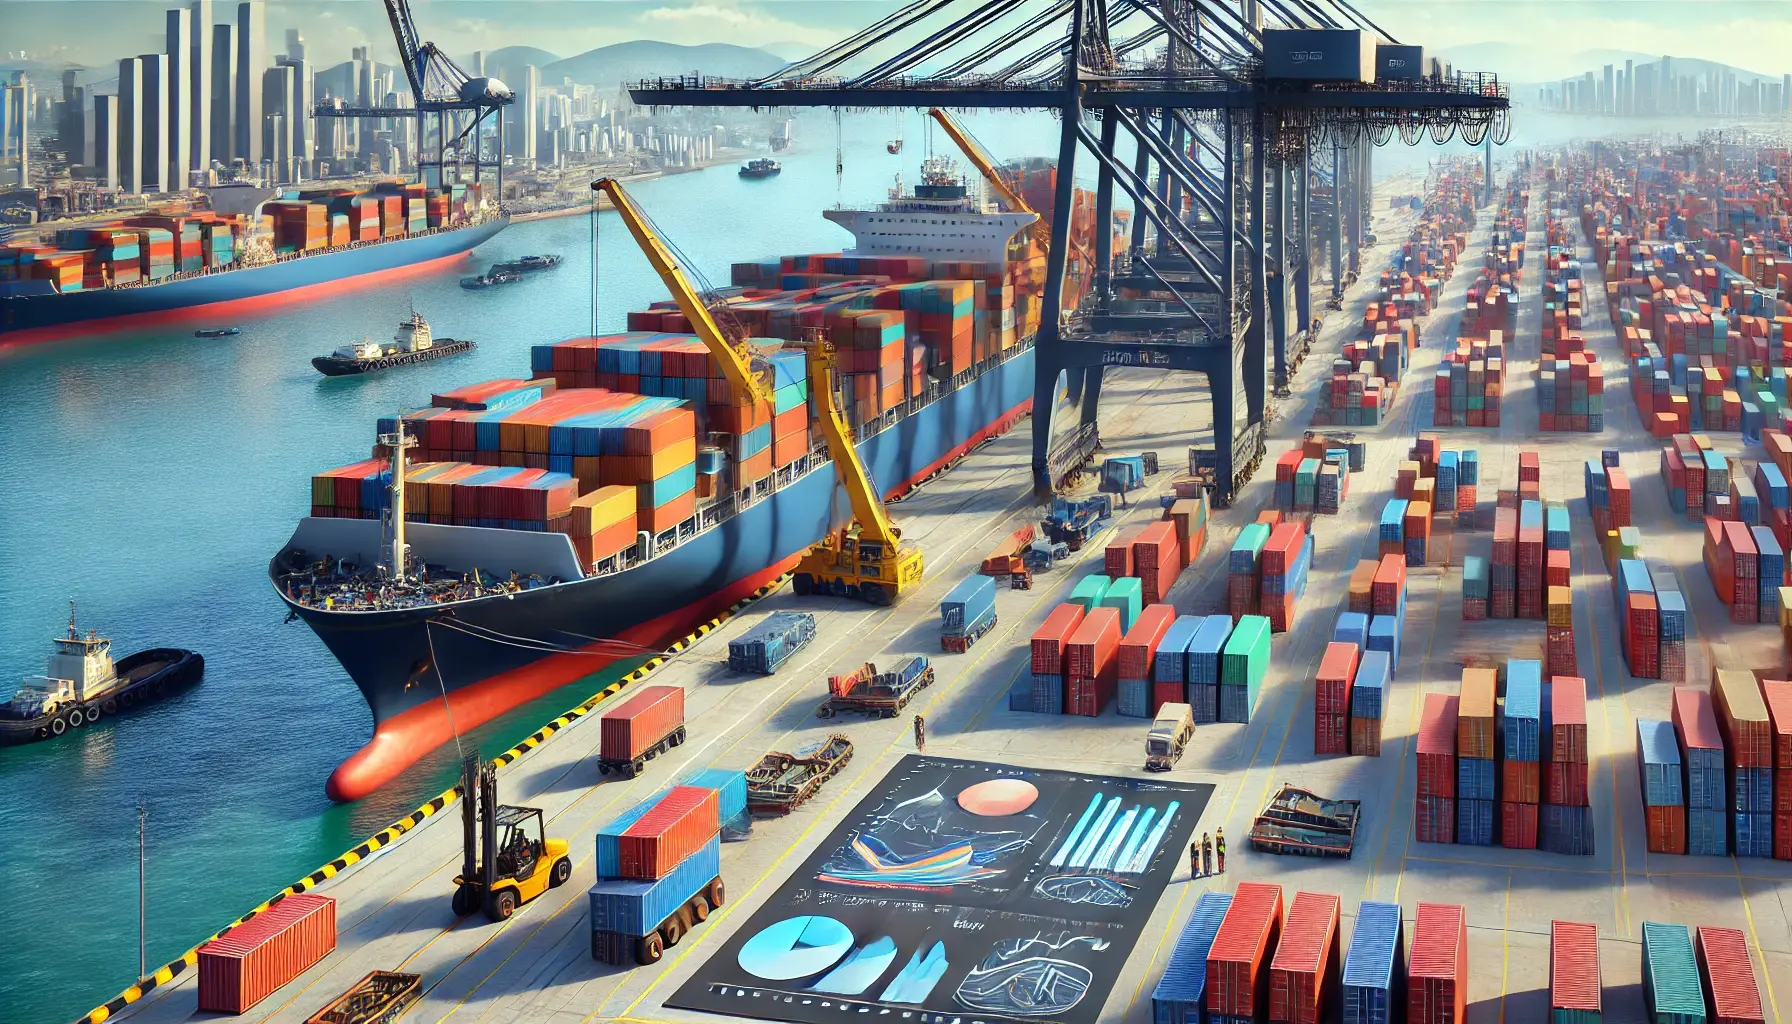

### WTO Dataset Introduction 
This dataset contains international trade data provided by the World Trade Organization (WTO). It offers important information for understanding how global trade is shaped and the relationships between different countries and product categories. The visual depicts a busy trade port scene, where a large cargo ship is being loaded with colorful containers, while cranes are lifting statistics graphs representing trade data onto the ship. This imagery symbolizes the complexity of modern trade and the significance of international relations. These data can be used to understand trade dynamics and economic relationships between countries. Additionally, they allow for the evaluation of the effectiveness of trade policies and the potential prediction of future trade trends.


In [1]:
# Importing libraries
# Kütüphaneleri içe aktarma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv("WtoData_20221014064138.csv",encoding='windows-1252')

In [3]:
df.head()

,Indicator Category,Indicator Code,Indicator,Reporting Economy Code,Reporting Economy ISO3A Code,Reporting Economy,Partner Economy Code,Partner Economy ISO3A Code,Partner Economy,Product/Sector Classification Code,Product/Sector Classification,Product/Sector Code,Product/Sector,Period Code,Period,Frequency Code,Frequency,Unit Code,Unit,Year,Value Flag Code,Value Flag,Text Value,Value
0,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,000,NaN,World,000,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,NaN,NaN,NaN,126.432
1,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,004,AFG,Afghanistan,000,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,E,Estimate,NaN,85.260
2,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,008,ALB,Albania,000,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,NaN,NaN,NaN,138.571
3,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,012,DZA,Algeria,000,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,E,Estimate,NaN,104.676
4,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,016,ASM,American Samoa,000,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,E,Estimate,NaN,101.862


In [4]:
df.columns

Index(['Indicator Category', 'Indicator Code', 'Indicator',
       'Reporting Economy Code', 'Reporting Economy ISO3A Code',
       'Reporting Economy', 'Partner Economy Code',
       'Partner Economy ISO3A Code', 'Partner Economy',
       'Product/Sector Classification Code', 'Product/Sector Classification',
       'Product/Sector Code', 'Product/Sector', 'Period Code', 'Period',
       'Frequency Code', 'Frequency', 'Unit Code', 'Unit', 'Year',
       'Value Flag Code', 'Value Flag', 'Text Value', 'Value'],
      dtype='object')

In [5]:
df.columns=['Indicator_Category', 'Indicator_Code', 'Indicator',
       'Reporting_Economy_Code', 'Reporting_Economy_ISO3A_Code',
       'Reporting_Economy', 'Partner_Economy_Code',
       'Partner_Economy_ISO3A_Code', 'Partner_Economy',
       'Product_Sector_Classification_Code', 'Product_Sector_Classification',
       'Product_Sector_Code', 'Product_Sector', 'Period_Code', 'Period',
       'Frequency_Code', 'Frequency', 'Unit_Code', 'Unit', 'Year',
       'Value_Flag_Code', 'Value_Flag', 'Text_Value', 'Value']

## Dataset Description for Economic Indicators
This dataset contains various data related to economic indicators, countries, and product sectors. The indicators include information about both the reporting and partner economies, as well as details such as the period, unit of measurement, and data value. The dataset is structured to enable comparisons and analyses of trade between countries, economic performance, and product sectors.

Below are brief descriptions of the columns included in the dataset:

# Dataset Column Descriptions

**Indicator_Category**: The category to which the indicator belongs.  
**Indicator_Code**: A unique code representing the specific indicator.  
**Indicator**: The name or description of the indicator.  
**Reporting_Economy_Code**: A numerical code representing the reporting economy.  
**Reporting_Economy_ISO3A_Code**: The ISO 3-letter code of the reporting economy.  
**Reporting_Economy**: The name of the reporting economy (country or region).  
**Partner_Economy_Code**: A numerical code representing the partner economy.  
**Partner_Economy_ISO3A_Code**: The ISO 3-letter code of the partner economy.  
**Partner_Economy**: The name of the partner economy (country or region).  
**Product_Sector_Classification_Code**: A code that classifies the product sector.  
**Product_Sector_Classification**: The name or description of the product sector classification.  
**Product_Sector_Code**: A numerical code for the specific product sector.  
**Product_Sector**: The name of the product sector.  
**Period_Code**: A numerical code representing the time period.  
**Period**: The time period for the data (e.g., year, quarter).  
**Frequency_Code**: A code for the frequency of data reporting (e.g., annual, quarterly).  
**Frequency**: The description of the data reporting frequency.  
**Unit_Code**: A code representing the unit of measurement.  
**Unit**: The unit in which the data is measured (e.g., USD, percentage).  
**Year**: The specific year of the data.  
**Value_Flag_Code**: A code indicating any specific flags associated with the data value.  
**Value_Flag**: The description of any flags for the data value (e.g., estimated, provisional).  
**Text_Value**: The textual representation of the value.  
**Value**: The numerical value of the indicator.

## Indicator_Category Column

**Trade in Commercial Services**: Refers to the international trade of services instead of goods, including sectors like finance, tourism, and education.

**Merchandise Trade - Indices and Prices**: Represents the international trade of physical goods. Trade indices measure the changes in prices of these goods over time.

**Merchandise Trade Values**: Represents the total value of goods exported and imported by a country, serving as an important indicator of economic growth and trade balance.

In [6]:
df.Indicator_Category.value_counts()

Indicator_Category
Trade in commercial services              86658
Merchandise trade - indices and prices     6304
Merchandise trade values                   4702
Name: count, dtype: int64

## Indicator Column
### Commercial Services

1. **Commercial services exports by sector and partner (annual)**: Represents annual service exports made through specific sectors and trade partners.
   
2. **Commercial services imports by sector and partner (annual)**: Represents annual service imports made through specific sectors and trade partners.

3. **Commercial services exports of selected economies (monthly)**: Shows monthly service export data from selected countries.

4. **Commercial services imports of selected economies (monthly)**: Shows monthly service import data from selected countries.

5. **Commercial services imports by main sector (quarterly)**: Represents service imports made through specific sectors over quarterly periods.

6. **Commercial services exports by main sector (quarterly)**: Represents service exports made through specific sectors over quarterly periods.

7. **Commercial services exports of selected economies (growth) (monthly)**: Indicates monthly growth in service exports from selected economies.

8. **Commercial services imports of selected economies (growth) (monthly)**: Indicates monthly growth in service imports from selected economies.

### Merchandise Trade

9. **Total merchandise exports (monthly)**: Represents the total merchandise exports made on a monthly basis.

10. **Total merchandise imports (monthly)**: Represents the total merchandise imports made on a monthly basis.

11. **Merchandise export volume indices, not seasonally adjusted (quarterly)**: Shows changes in merchandise export volume on a monthly or annual basis.

12. **Merchandise import volume indices, not seasonally adjusted (quarterly)**: Shows changes in merchandise import volume on a monthly or annual basis.

13. **Total merchandise exports (quarterly)**: Represents the total merchandise exports made over quarterly periods.

14. **Total merchandise imports (quarterly)**: Represents the total merchandise imports made over quarterly periods.

15. **Merchandise import volume indices, seasonally adjusted (quarterly)**: Indicates import volume indices with seasonal effects removed.

16. **Merchandise export volume indices, seasonally adjusted (quarterly)**: Indicates export volume indices with seasonal effects removed.

17. **Merchandise imports by product group (annual)**: Represents merchandise imports categorized by product groups on an annual basis.

18. **Merchandise exports by product group (annual)**: Represents merchandise exports categorized by product groups on an annual basis.

19. **Merchandise import volume chained indices (annual)**: Shows changes in import volumes on an annual basis.

20. **Merchandise import volume fixed-base indices (annual)**: Shows changes in import volumes calculated based on a fixed base annually.

21. **Merchandise export volume fixed-base indices (annual)**: Shows changes in export volumes calculated based on a fixed base annually.

22. **Merchandise export volume chained indices (annual)**: Shows changes in export volumes on an annual basis.

23. **Merchandise import unit value chained indices (annual)**: Represents changes in unit prices of imported goods on an annual basis.

24. **Merchandise import unit value fixed-base indices (annual)**: Represents changes in unit prices of imported goods calculated based on a fixed base annually.

25. **Merchandise export unit value fixed-base indices (annual)**: Represents changes in unit prices of exported goods calculated based on a fixed base annually.

26. **Merchandise export unit value chained indices (annual)**: Represents changes in unit prices of exported goods on an annual basis.

27. **Merchandise import value chained indices (annual)**: Represents annual changes in the total value of imports.

28. **Merchandise import value fixed-base indices (annual)**: Represents annual changes in the total value of imports calculated based on a fixed base.

29. **Merchandise export value chained indices (annual)**: Represents annual changes in the total value of exports.

30. **Merchandise export value fixed-base indices (annual)**: Represents annual changes in the total value of exports calculated based on a fixed base.

### Price Indices (Monthly)

31. **Export price indices of manufactured goods (monthly)**: Shows the monthly export prices of manufactured goods.

32. **Export price changes of manufactured goods (monthly)**: Indicates monthly changes in the prices of manufactured goods.

33. **Import price changes of manufactured goods (monthly)**: Indicates monthly changes in the prices of imported manufactured goods.

34. **Import price indices of manufactured goods (monthly)**: Shows changes in the prices of imported goods on a monthly basis.

In [7]:
df['Indicator'].value_counts()

Indicator
Commercial services exports by sector and partner – annual                17661
Commercial services imports by sector and partner – annual                15822
Commercial services exports of selected economies – monthly               10714
Commercial services imports of selected economies – monthly               10698
Commercial services imports by main sector – quarterly                     9507
Commercial services exports by main sector – quarterly                     9428
Commercial services exports of selected economies (growth) – monthly       6417
Commercial services imports of selected economies (growth) – monthly       6411
Total merchandise exports - monthly                                        1460
Total merchandise imports - monthly                                        1460
Merchandise export volume indices, not seasonally adjusted - quarterly      714
Merchandise import volume indices, not seasonally adjusted - quarterly      714
Total merchandise exports - qu


## Reporting_Economy_ISO3A_Code Column
-- **Explaining =** Each code here represents a country.


In [8]:
df["Reporting_Economy_ISO3A_Code"].isnull().sum() 

4192

In [9]:
df['Reporting_Economy_ISO3A_Code']=df['Reporting_Economy_ISO3A_Code'].fillna('Unknown')

In [10]:
df.sample(1)

,Indicator_Category,Indicator_Code,Indicator,Reporting_Economy_Code,Reporting_Economy_ISO3A_Code,Reporting_Economy,Partner_Economy_Code,Partner_Economy_ISO3A_Code,Partner_Economy,Product_Sector_Classification_Code,Product_Sector_Classification,Product_Sector_Code,Product_Sector,Period_Code,Period,Frequency_Code,Frequency,Unit_Code,Unit,Year,Value_Flag_Code,Value_Flag,Text_Value,Value
56974,Trade in commercial services,ITS_CS_MM_GR,Commercial services imports of selected econom...,276,DEU,Germany,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SF,Insurance and pension services,M04,April,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,NaN,9.0


In [11]:
df.Partner_Economy_Code.value_counts()

Partner_Economy_Code
000    80302
918      516
EUT      472
ZX9      302
250      281
276      281
528      272
156      272
158      271
702      270
392      269
380      268
036      267
356      258
764      254
360      254
554      253
410      251
124      249
484      245
376      244
344      244
724      243
620      241
040      241
756      240
076      239
372      238
608      236
682      234
056      233
578      231
752      231
616      228
208      222
642      221
792      219
442      219
458      217
246      216
643      215
504      212
862      212
191      211
032      209
440      209
710      208
300      208
170      202
152      201
203      197
100      196
428      195
703      195
196      193
348      192
705      188
470      186
233      184
826      183
927      175
096      144
604      143
704      140
591      134
048      133
222      132
566      129
400      126
512      124
320      123
188      122
214      121
060      119
340      119
558 

In [12]:
df.sample(10)

,Indicator_Category,Indicator_Code,Indicator,Reporting_Economy_Code,Reporting_Economy_ISO3A_Code,Reporting_Economy,Partner_Economy_Code,Partner_Economy_ISO3A_Code,Partner_Economy,Product_Sector_Classification_Code,Product_Sector_Classification,Product_Sector_Code,Product_Sector,Period_Code,Period,Frequency_Code,Frequency,Unit_Code,Unit,Year,Value_Flag_Code,Value_Flag,Text_Value,Value
47071,Trade in commercial services,ITS_CS_MM,Commercial services imports of selected econom...,300,GRC,Greece,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SPX1,Memo item: Other services,M08,August,M,Monthly,USM,Million US dollar,2021,NaN,NaN,NaN,525.159757
82216,Trade in commercial services,ITS_CS_QM,Commercial services imports by main sector – q...,344,HKG,"Hong Kong, China",000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SC,Transport,Q3,Third Quarter,Q,Quarterly,USM,Million US dollar,2021,NaN,NaN,NaN,5552.898830
73934,Trade in commercial services,ITS_CS_MX_GR,Commercial services exports of selected econom...,250,FRA,France,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SL,Memo item: Government goods and services n.i.e.,M01,January,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,NaN,13.000000
66424,Trade in commercial services,ITS_CS_MX,Commercial services exports of selected econom...,410,KOR,"Korea, Republic of",000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SK2,"Other personal, cultural, and recreational ser...",M05,May,M,Monthly,USM,Million US dollar,2022,NaN,NaN,NaN,22.000000
56406,Trade in commercial services,ITS_CS_MM_GR,Commercial services imports of selected econom...,191,HRV,Croatia,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,S,Memo item: Total services,M09,September,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,NaN,31.000000
46798,Trade in commercial services,ITS_CS_MM,Commercial services imports of selected econom...,276,DEU,Germany,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SH,Charges for the use of intellectual property n...,M04,April,M,Monthly,USM,Million US dollar,2022,NaN,NaN,NaN,1382.940739
73293,Trade in commercial services,ITS_CS_MX_GR,Commercial services exports of selected econom...,156,CHN,China,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SB,Maintenance and repair services n.i.e.,M04,April,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,NaN,46.000000
37691,Trade in commercial services,ITS_CS_AX6,Commercial services exports by sector and part...,840,USA,United States of America,158,CHT,Chinese Taipei,BOP6,Services - Extended Balance of Payments Classi...,SL,Memo item: Government goods and services n.i.e.,A,Annual,A,Annual,USM,Million US dollar,2021,NaN,NaN,NaN,375.000000
85023,Trade in commercial services,ITS_CS_QM,Commercial services imports by main sector – q...,591,PAN,Panama,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SK,"Personal, cultural, and recreational services",Q2,Second Quarter,Q,Quarterly,USM,Million US dollar,2021,NaN,NaN,NaN,5.418725
51290,Trade in commercial services,ITS_CS_MM,Commercial services imports of selected econom...,620,PRT,Portugal,000,NaN,World,BOP6,Services - Extended Balance of Payments Classi...,SC3,Other modes of transport,M01,January,M,Monthly,USM,Million US dollar,2021,NaN,NaN,NaN,43.267372


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97664 entries, 0 to 97663
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Indicator_Category                  97664 non-null  object 
 1   Indicator_Code                      97664 non-null  object 
 2   Indicator                           97664 non-null  object 
 3   Reporting_Economy_Code              97664 non-null  object 
 4   Reporting_Economy_ISO3A_Code        97664 non-null  object 
 5   Reporting_Economy                   97664 non-null  object 
 6   Partner_Economy_Code                97664 non-null  object 
 7   Partner_Economy_ISO3A_Code          16293 non-null  object 
 8   Partner_Economy                     97664 non-null  object 
 9   Product_Sector_Classification_Code  97664 non-null  object 
 10  Product_Sector_Classification       97664 non-null  object 
 11  Product_Sector_Code                 97664

## Partner_Economy_ISO3A_Code Colums
-- Explaining = Each code here represents a country.                        
   We filled the NaN values in this column with Unknown.


In [14]:
df['Partner_Economy_ISO3A_Code']=df['Partner_Economy_ISO3A_Code'].fillna('Unknown')

## Product_Sector_Classification_Code
-- **BOP6 and SITC3 codes are the standard codes used to classify international trade data. 

-- **BOP6 (Balance of Payments, 6th Edition): Used to classify a country's balance of payments transactions. 

-- **SITC3 (Standard International Trade Classification, Revision 3): Classifies products in international trade.  

-- **These codes facilitate the analysis of trade goods and services.            


In [15]:
df.Product_Sector_Classification_Code.value_counts()

Product_Sector_Classification_Code
BOP6     86658
SITC3    11006
Name: count, dtype: int64

## Product_Sector_Classification

-- **This column shows the classification of trade data into services and merchandise using two different systems: 

-- **Services - EBOPS 2010: Classification for trade in services (code 86658). 

-- **Merchandise - SITC Revision 3: Classification for international trade in goods (code 11006).              

In [16]:
df.Product_Sector_Classification.value_counts()

Product_Sector_Classification
Services - Extended Balance of Payments Classification (EBOPS 2010)    86658
Merchandise - SITC Revision 3 (aggregates)                             11006
Name: count, dtype: int64

## Period_Code Column
--**A=** ANNUAL
--**Q=** QUARTER
--**M=** MOUNTH

In [17]:
df.Period.value_counts()

Period
Annual            37663
First Quarter      8419
Second Quarter     5177
Third Quarter      4509
Fourth Quarter     4244
January            4081
February           4013
March              4011
April              3866
May                3865
June               3780
July               3650
August             2250
September          2171
October            2001
November           1996
December           1968
Name: count, dtype: int64

Unit Column
Million US Dollar:
This value represents the total trade volume in million US dollars for a specified time period.

% Change Over the Same Period of the Previous Year:
This indicates the percentage change in trade compared to the same period in the previous year.

2005Q1=100:
This is a reference point indicating trade levels in relation to the first quarter of 2005, where 100 represents that period.

Previous Year=100:
This shows trade levels in relation to the previous year, indicating the change compared to that year.

2015=100:
This indicates trade levels in relation to the year 2015.

% Change Over Previous Year:
This represents the percentage increase in trade compared to the previous year.

% Change Over Previous Month:
This indicates the percentage change in trade compared to the previous month.

January 2005=100:
This sets January 2005 as a reference point for measuring changes in trade.

In [18]:
df.Unit.value_counts()

Unit
Million US dollar                                     78532
% change over the same period of the previous year    12828
2005Q1=100                                             2160
Previous year=100                                      1558
2015=100                                               1558
% change over previous year                             536
% change over previous month                            252
January 2005=100                                        240
Name: count, dtype: int64

## Unit_Code columns

In [19]:
df.Unit_Code.value_counts()

Unit_Code
USM       78532
YOY       12828
ID05Q1     2160
IDP        1558
ID15       1558
APC         536
MPC         252
ID0501      240
Name: count, dtype: int64

In [20]:
df.Value_Flag.value_counts()

Value_Flag
Estimate            9984
Forecasted value     108
Name: count, dtype: int64

 Value_Flag_Code:         
 **This column categorizes the nature of the data:
 
 -- **'E' (Estimate): Indicates estimated values derived from models or projections. 
 
  **It represents a significant portion of the dataset (9,984 entries), suggesting that many values are not directly observed.
   
 -- **'A' (Actual): Represents actual, observed data collected directly. 
 
  **There are only 108 entries marked as 'A', indicating a smaller segment of reliable, directly measured information.              
 **This flagging system helps assess data quality and informs analyses regarding economic trends and reliability.          

In [21]:
df.Value_Flag_Code.value_counts()

Value_Flag_Code
E    9984
A     108
Name: count, dtype: int64

**Text_Value
--**Since the entire Text_Value column is Nan value, we deleted the column.

In [22]:
del df["Text_Value"]

In [23]:
df.head(5)

,Indicator_Category,Indicator_Code,Indicator,Reporting_Economy_Code,Reporting_Economy_ISO3A_Code,Reporting_Economy,Partner_Economy_Code,Partner_Economy_ISO3A_Code,Partner_Economy,Product_Sector_Classification_Code,Product_Sector_Classification,Product_Sector_Code,Product_Sector,Period_Code,Period,Frequency_Code,Frequency,Unit_Code,Unit,Year,Value_Flag_Code,Value_Flag,Value
0,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,000,Unknown,World,000,Unknown,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,NaN,NaN,126.432
1,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,004,AFG,Afghanistan,000,Unknown,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,E,Estimate,85.260
2,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,008,ALB,Albania,000,Unknown,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,NaN,NaN,138.571
3,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,012,DZA,Algeria,000,Unknown,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,E,Estimate,104.676
4,Merchandise trade - indices and prices,ITS_MTP_AM,Merchandise import value chained indices - annual,016,ASM,American Samoa,000,Unknown,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,IDP,Previous year=100,2021,E,Estimate,101.862


# Data Set Analysis

In [24]:
top_15_trading_countries = df.Reporting_Economy.value_counts().head(15)

In [25]:
top_15_trading_countries

Reporting_Economy
United States of America    11867
United Kingdom               5995
Korea, Republic of           3166
Portugal                     2457
Japan                        2352
Ukraine                      2338
North Macedonia              2062
Brazil                       1864
Serbia                       1735
Bulgaria                     1689
Philippines                  1675
Mongolia                     1671
Germany                      1634
Türkiye                      1572
France                       1543
Name: count, dtype: int64

### Top 15 commercial activities analysis
The graph shows the frequency of each country appearing in the dataset, which can be interpreted as an indicator of the country's trading activity or the frequency with which their trade is reported. The United States and the United Kingdom are the most frequently reported countries, suggesting that they are dominant players in global trade or that their trade activities are more frequently documented in this dataset.


Countries like Korea, Portugal, and Japan also appear frequently, indicating their significant role in trade. On the other hand, countries like Bulgaria, North Macedonia, and Mongolia appear less often, which could suggest either smaller trade volumes or less emphasis on reporting their trade activities in this particular dataset.


This analysis can be expanded by exploring whether the frequency is tied to specific sectors or time periods, allowing for a deeper understanding of global trade dynamics.

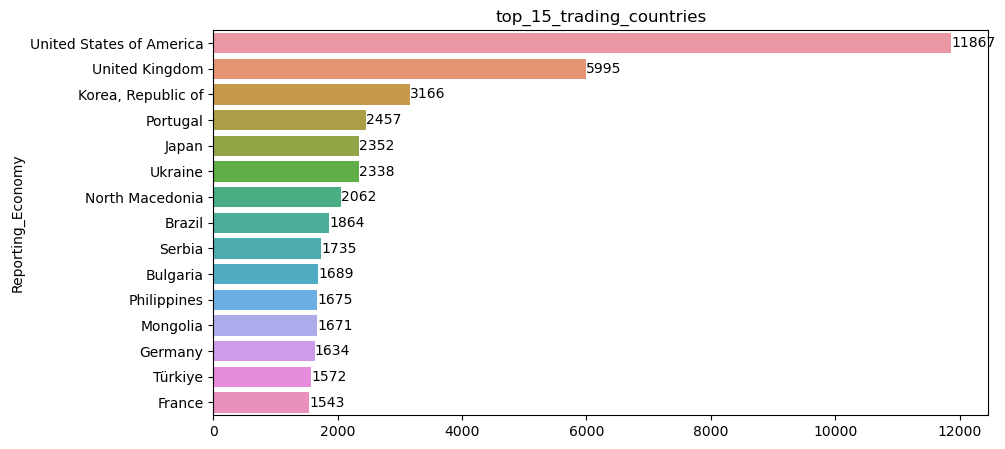

In [26]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=top_15_trading_countries.values,y=top_15_trading_countries.index)
plt.title('top_15_trading_countries')
for p in ax.containers:
    ax.bar_label(p)

 General Remarks: High Trade Activities Worldwide in 2021:                               
In 2021, the United States engaged in a substantial number of commercial activities globally; however, a significant decrease was observed in 2022. Possible reasons for this decline include economic downturns, changes in trade policies, or the lingering effects of the pandemic. 

Stable Trade with European and Asian Partners:                                 
There is very little difference in trade numbers with major economies such as the European Union, Japan, and China. This indicates that the United States maintains ongoing and extensive commercial activities in these regions. 

Stability with Canada and Switzerland:               
Trade relations with Canada, a close neighbor, and Switzerland, a significant financial center, are progressing at a similar level as well.

In [27]:
USA_Commercial_Activities =  df[df.Reporting_Economy == "United States of America"]

In [28]:
USA_Commercial_Activities_top_10 = USA_Commercial_Activities["Partner_Economy"].value_counts().nlargest(10)

In [29]:
USA_Commercial_Activities_top_10

Partner_Economy
World             1632
Euro Area (19)     175
European Union     172
Japan              165
Germany            163
China              163
Switzerland        162
Spain              162
Canada             162
Netherlands        161
Name: count, dtype: int64

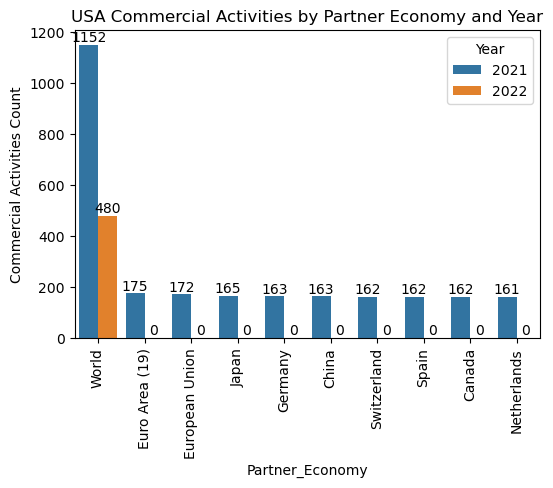

In [30]:
ax = sns.countplot(data = USA_Commercial_Activities, x = "Partner_Economy", 
              order=USA_Commercial_Activities_top_10.index, hue = "Year" )
plt.xticks(rotation=90)

plt.title('USA Commercial Activities by Partner Economy and Year')

plt.ylabel("Commercial Activities Count")

plt.legend(title='Year')

for p in ax.containers:
    ax.bar_label(p);

In [31]:
United_Kingdom_Commercial_Activities =  df[df.Reporting_Economy == "United Kingdom"]

In [32]:
United_Kingdom_Commercial_Activities_Top_10 = United_Kingdom_Commercial_Activities["Partner_Economy"].value_counts().nlargest(10)

In [33]:
United_Kingdom_Commercial_Activities_Top_10

Partner_Economy
World                                490
France                                96
European Union (28)                   96
Singapore                             94
Germany                               94
United States of America              92
Italy                                 92
Sweden                                92
Montenegro                            90
Venezuela, Bolivarian Republic of     90
Name: count, dtype: int64

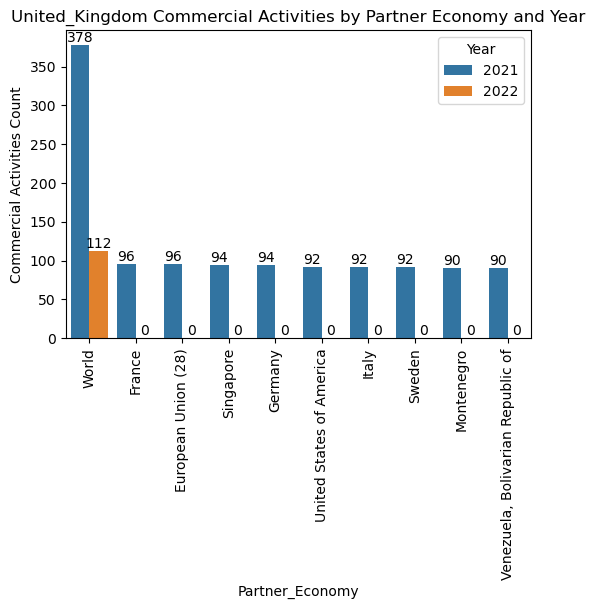

In [34]:
ax=sns.countplot(data = United_Kingdom_Commercial_Activities, x = "Partner_Economy",
              order=United_Kingdom_Commercial_Activities_Top_10.index, hue = "Year" )
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation=90)
plt.title('United_Kingdom Commercial Activities by Partner Economy and Year')
plt.ylabel('Commercial Activities Count');

In [35]:
df.sample(10)

,Indicator_Category,Indicator_Code,Indicator,Reporting_Economy_Code,Reporting_Economy_ISO3A_Code,Reporting_Economy,Partner_Economy_Code,Partner_Economy_ISO3A_Code,Partner_Economy,Product_Sector_Classification_Code,Product_Sector_Classification,Product_Sector_Code,Product_Sector,Period_Code,Period,Frequency_Code,Frequency,Unit_Code,Unit,Year,Value_Flag_Code,Value_Flag,Value
57909,Trade in commercial services,ITS_CS_MM_GR,Commercial services imports of selected econom...,410,KOR,"Korea, Republic of",000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SH,Charges for the use of intellectual property n...,M08,August,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,22.000000
32027,Trade in commercial services,ITS_CS_AX6,Commercial services exports by sector and part...,600,PRY,Paraguay,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SPX4,Goods-related services,A,Annual,A,Annual,USM,Million US dollar,2021,NaN,NaN,359.631000
76819,Trade in commercial services,ITS_CS_MX_GR,Commercial services exports of selected econom...,703,SVK,Slovak Republic,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,S,Memo item: Total services,M12,December,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,13.000000
48045,Trade in commercial services,ITS_CS_MM,Commercial services imports of selected econom...,392,JPN,Japan,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SJ1,Research and development services,M03,March,M,Monthly,USM,Million US dollar,2022,NaN,NaN,1809.227593
11155,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,024,AGO,Angola,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SCB,Freight (All modes of transport),A,Annual,A,Annual,USM,Million US dollar,2021,NaN,NaN,2009.577000
70977,Trade in commercial services,ITS_CS_MX,Commercial services exports of selected econom...,807,MKD,North Macedonia,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SE2,Construction in the reporting economy,M10,October,M,Monthly,USM,Million US dollar,2021,NaN,NaN,1.821432
96379,Trade in commercial services,ITS_CS_QX,Commercial services exports by main sector – q...,788,TUN,Tunisia,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SC,Transport,Q1,First Quarter,Q,Quarterly,USM,Million US dollar,2021,NaN,NaN,186.423320
9434,Merchandise trade values,ITS_MTV_MX,Total merchandise exports - monthly,710,ZAF,South Africa,000,Unknown,World,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,M03,March,M,Monthly,USM,Million US dollar,2021,NaN,NaN,11227.541452
74313,Trade in commercial services,ITS_CS_MX_GR,Commercial services exports of selected econom...,300,GRC,Greece,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SC,Transport,M12,December,M,Monthly,YOY,% change over the same period of the previous ...,2021,NaN,NaN,67.000000
83382,Trade in commercial services,ITS_CS_QM,Commercial services imports by main sector – q...,428,LVA,Latvia,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SJ,Other business services,Q1,First Quarter,Q,Quarterly,USM,Million US dollar,2021,NaN,NaN,328.923400


# Sectoral distribution graph by years

In [36]:
Product_Sector_Top_10 = df.Product_Sector.value_counts().nlargest(10)

In [37]:
Product_Sector_Top_10

Product_Sector
Total merchandise                                         10514
Memo item: Total services                                  5570
Travel                                                     4129
Transport                                                  4067
Memo item: Government goods and services n.i.e.            3437
Commercial services                                        3396
Memo item: Goods and services                              3366
Other business services                                    3307
Telecommunications, computer, and information services     3251
Insurance and pension services                             3097
Name: count, dtype: int64

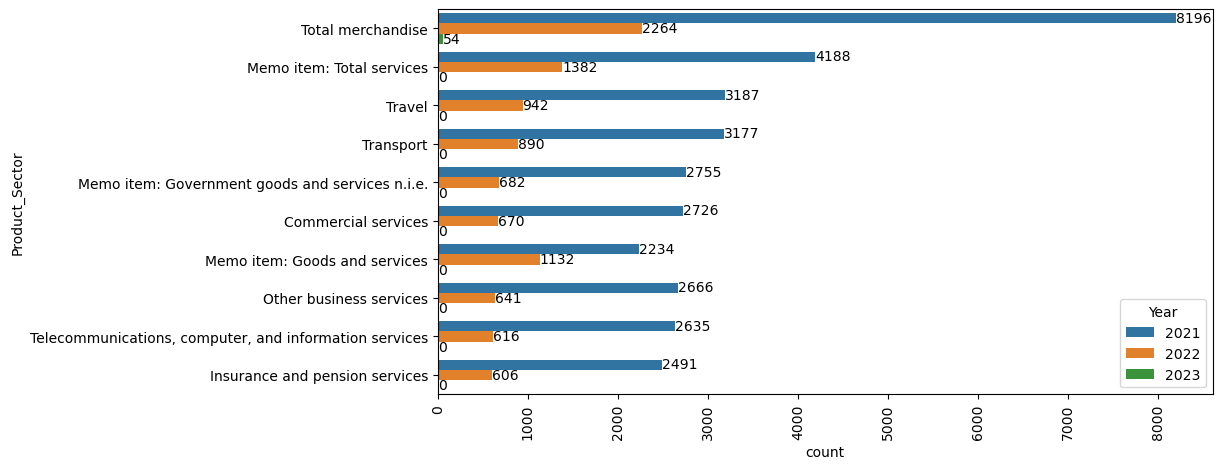

In [38]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df, y = "Product_Sector", order = Product_Sector_Top_10.index, hue= "Year"  )

plt.xticks(rotation = 90)
for p in ax.containers:
    ax.bar_label(p);

### Analysis of Sector Data
The data highlights the dominance of merchandise trade in the overall sector and the diversity of services offered. Travel and transport services hold significant positions within the sector, while other business and information services are experiencing rapid growth.

These findings provide valuable insights for future strategic planning and investment decisions. Monitoring trends within the sector is critical for the development and enhancement of these services.

# Top 5 most active garafics by year

In [39]:
Total_merchandise=df[df['Product_Sector']=='Total merchandise']
Top_10_Total_merchandise = Total_merchandise['Reporting_Economy'].value_counts().head(10) 

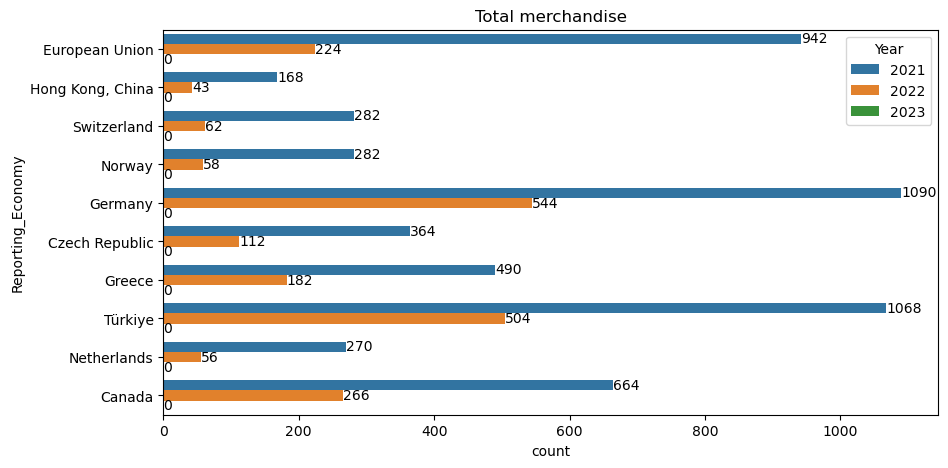

In [40]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df, y = 'Reporting_Economy', order = Top_10_Total_merchandise.index, hue = "Year" )
ax.set_title("Total merchandise")
for p in ax.containers:
    ax.bar_label(p);

In [41]:
Memo_item=df[df['Product_Sector']=='Memo item: Total services'] 
Top_10_Memo_item = Memo_item['Reporting_Economy'].value_counts().head(10)

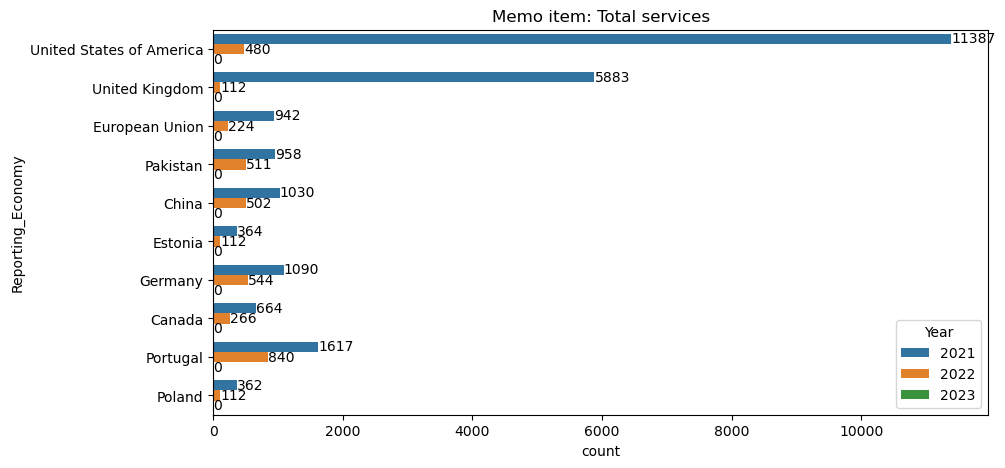

In [42]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df, y = 'Reporting_Economy', order = Top_10_Memo_item.index, hue = "Year" )
ax.set_title("Memo item: Total services")
for p in ax.containers:
    ax.bar_label(p);

In [43]:
Travel=df[df['Product_Sector']=='Travel']
Top_10_Travel = Travel['Reporting_Economy'].value_counts().head(10)

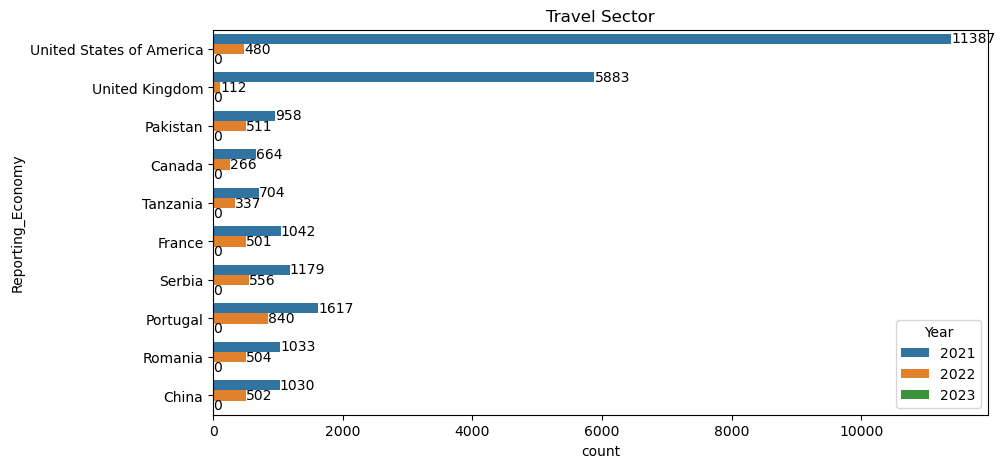

In [44]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df, y = 'Reporting_Economy', order = Top_10_Travel.index, hue = "Year" )
ax.set_title("Travel Sector")
for p in ax.containers:
    ax.bar_label(p);

In [45]:
Transport=df[df['Product_Sector']=='Transport']
Top_10_transport = Transport['Reporting_Economy'].value_counts().head(10)


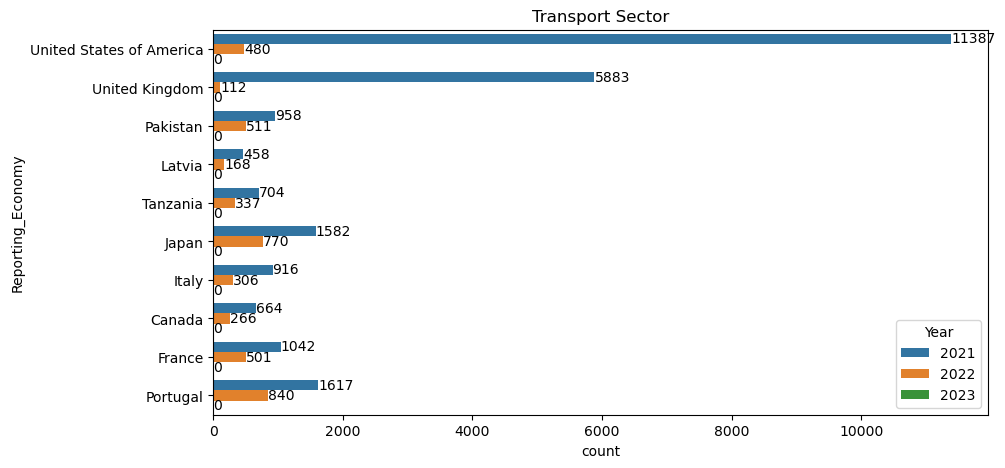

In [46]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df, y = 'Reporting_Economy', order = Top_10_transport.index, hue = "Year" )
ax.set_title("Transport Sector")
for p in ax.containers:
    ax.bar_label(p);

In [47]:
Government_goods=df[df['Product_Sector']=='Memo item: Government goods and services n.i.e.']
Top_10_Government_goods = Government_goods['Reporting_Economy'].value_counts().head(10)

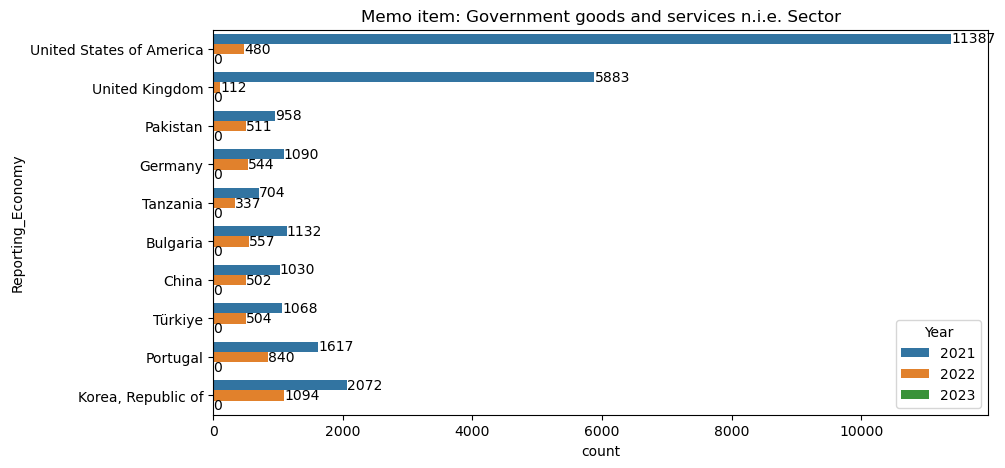

In [48]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df, y = 'Reporting_Economy', order = Top_10_Government_goods.index, hue = "Year" )
ax.set_title("Memo item: Government goods and services n.i.e. Sector")

for p in ax.containers:
    ax.bar_label(p);

# Examination of the values in Indicator_Category on the basis of top 10 countries. 

In [49]:
df_pie =  df.Indicator_Category.value_counts()
df_pie

Indicator_Category
Trade in commercial services              86658
Merchandise trade - indices and prices     6304
Merchandise trade values                   4702
Name: count, dtype: int64

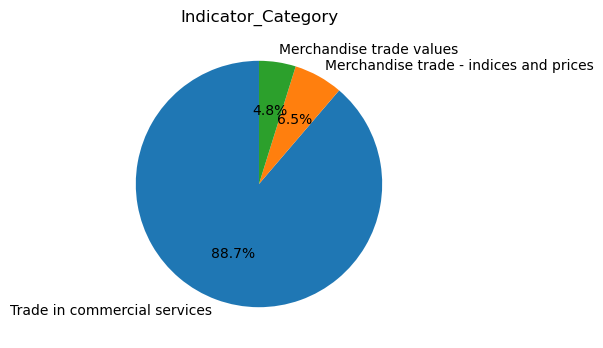

In [50]:
plt.pie(df_pie.values, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Indicator_Category')
plt.show()

In [51]:
df_top_10 = df["Reporting_Economy"].value_counts().head(10)
df_top_10

Reporting_Economy
United States of America    11867
United Kingdom               5995
Korea, Republic of           3166
Portugal                     2457
Japan                        2352
Ukraine                      2338
North Macedonia              2062
Brazil                       1864
Serbia                       1735
Bulgaria                     1689
Name: count, dtype: int64

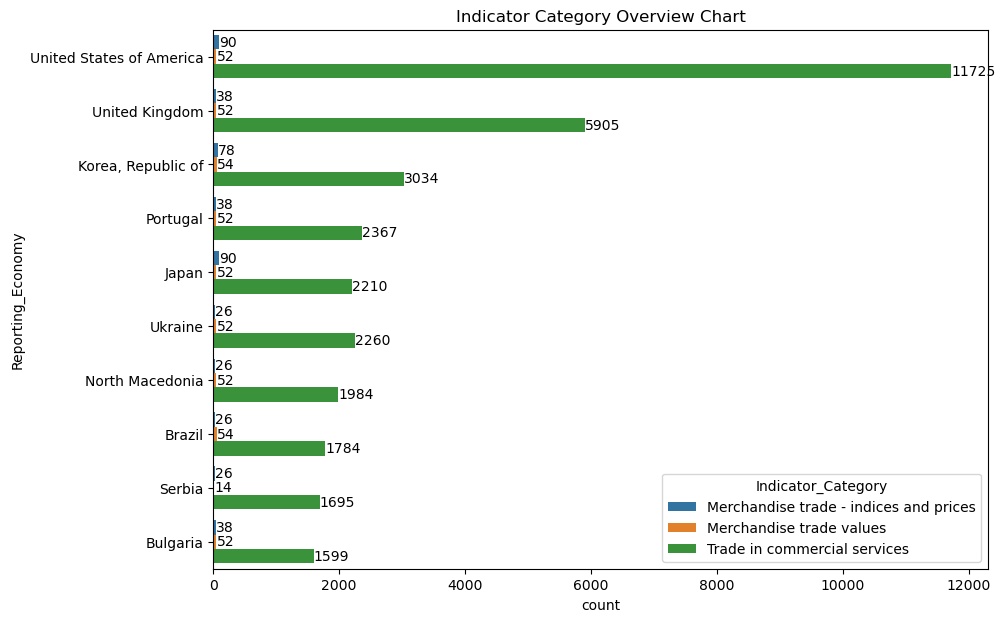

In [52]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data = df, 
              y = "Reporting_Economy", order = df_top_10.index, hue = "Indicator_Category")
plt.title("Indicator Category Overview Chart")
for p in ax.containers:
    ax.bar_label(p)

In [53]:
max_Trade_in_commercial_services=df[df["Indicator_Category"]=='Trade in commercial services']
max_Trade_in_commercial_services_top_10 =max_Trade_in_commercial_services["Reporting_Economy"].value_counts().head(10)
max_Trade_in_commercial_services_top_10

Reporting_Economy
United States of America    11725
United Kingdom               5905
Korea, Republic of           3034
Portugal                     2367
Ukraine                      2260
Japan                        2210
North Macedonia              1984
Brazil                       1784
Serbia                       1695
Mongolia                     1655
Name: count, dtype: int64

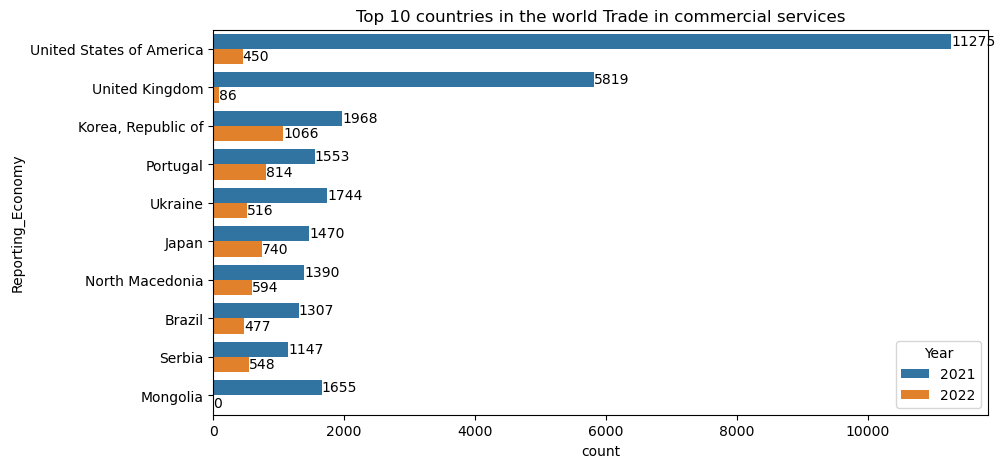

In [54]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = max_Trade_in_commercial_services, 
              y = "Reporting_Economy", order = max_Trade_in_commercial_services_top_10.index, hue = "Year")
plt.title("Top 10 countries in the world Trade in commercial services")
for p in ax.containers:
    ax.bar_label(p)

### Analysis
The chart shows a significant decline in trade in commercial services in 2022 overall. This decline is particularly notable in the United States and the United Kingdom. It can be inferred that a slowdown in global trade or various economic/political factors have severely impacted the volume of trade.

In [55]:
indices_and_prices=df[df["Indicator_Category"]=='Merchandise trade - indices and prices']
indices_and_prices_top_10 = indices_and_prices["Reporting_Economy"].value_counts().head(10)
indices_and_prices_top_10

Reporting_Economy
European Union              162
World                        98
Japan                        90
United States of America     90
Switzerland                  90
Canada                       86
Singapore                    78
Chinese Taipei               78
Korea, Republic of           78
China                        62
Name: count, dtype: int64

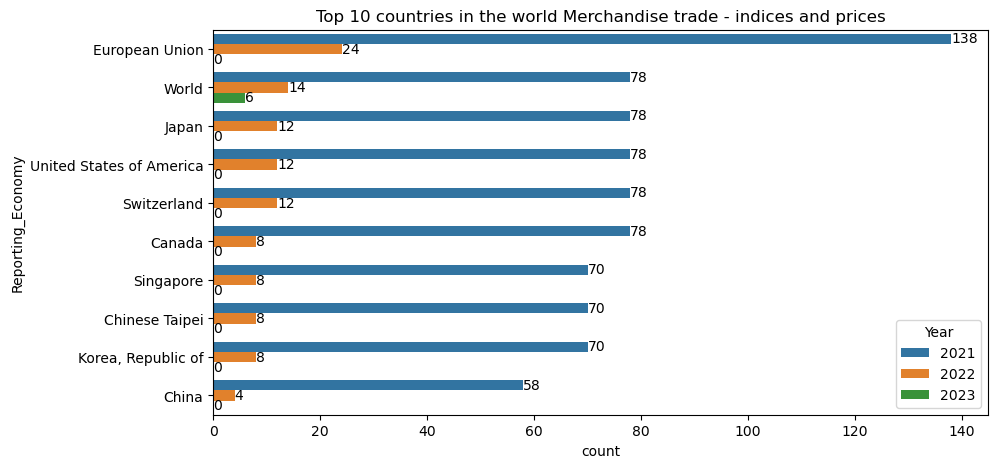

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = indices_and_prices, 
              y = "Reporting_Economy", order = indices_and_prices_top_10.index, hue = "Year")
plt.title("Top 10 countries in the world Merchandise trade - indices and prices")
for p in ax.containers:
    ax.bar_label(p)

### Analysis
The chart shows that the European Union had a significantly high trade index in 2021, but this index declined in the following years. The global trade indices, however, saw a sharp decline in 2023. Countries such as Japan, the United States, and Switzerland maintained stable trade indices in 2021 and 2022, while some countries/economies, like China and the global index, experienced significant fluctuations. These fluctuations could indicate the impact of global economic changes or supply chain disruptions on trade indices. The lower amount of data for 2023 could suggest data limitations or that certain economic developments have not yet been fully reflected.

In [57]:
Merchandise_trade_values=df[df["Indicator_Category"]=='Merchandise trade values']
Merchandise_trade_values_top_10 = Merchandise_trade_values["Reporting_Economy"].value_counts().head(10)
Merchandise_trade_values_top_10

Reporting_Economy
European Union        156
Singapore              54
Paraguay               54
Hong Kong, China       54
China                  54
Chile                  54
Korea, Republic of     54
Brazil                 54
New Zealand            54
Norway                 54
Name: count, dtype: int64

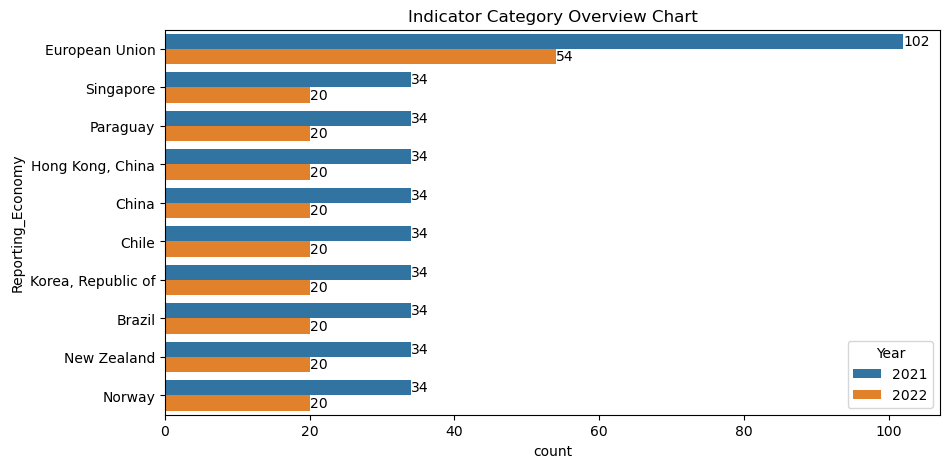

In [58]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = Merchandise_trade_values, 
              y = "Reporting_Economy", order = Merchandise_trade_values_top_10.index, hue = "Year")
plt.title("Indicator Category Overview Chart")
for p in ax.containers:
    ax.bar_label(p)

### Analysis
The significant drop in the European Union's trade values may indicate economic or political uncertainties in the region. On the other hand, the increase in trade values for other countries from 2021 to 2022 suggests that global trade is growing in different regions.

In [59]:
df.sample(5)

,Indicator_Category,Indicator_Code,Indicator,Reporting_Economy_Code,Reporting_Economy_ISO3A_Code,Reporting_Economy,Partner_Economy_Code,Partner_Economy_ISO3A_Code,Partner_Economy,Product_Sector_Classification_Code,Product_Sector_Classification,Product_Sector_Code,Product_Sector,Period_Code,Period,Frequency_Code,Frequency,Unit_Code,Unit,Year,Value_Flag_Code,Value_Flag,Value
86311,Trade in commercial services,ITS_CS_QM,Commercial services imports by main sector – q...,716,ZWE,Zimbabwe,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SOX1,Other commercial services,Q1,First Quarter,Q,Quarterly,USM,Million US dollar,2021,E,Estimate,61.433364
34698,Trade in commercial services,ITS_CS_AX6,Commercial services exports by sector and part...,826,GBR,United Kingdom,344,HKG,"Hong Kong, China",BOP6,Services - Extended Balance of Payments Classi...,SJ22,"Advertising, market research, and public opini...",A,Annual,A,Annual,USM,Million US dollar,2021,NaN,NaN,239.318373
23009,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,840,USA,United States of America,360,IDN,Indonesia,BOP6,Services - Extended Balance of Payments Classi...,SJ32,"Waste treatment and de-pollution, agricultural...",A,Annual,A,Annual,USM,Million US dollar,2021,NaN,NaN,2.000000
84310,Trade in commercial services,ITS_CS_QM,Commercial services imports by main sector – q...,524,NPL,Nepal,000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SC,Transport,Q3,Third Quarter,Q,Quarterly,USM,Million US dollar,2021,NaN,NaN,198.299159
66033,Trade in commercial services,ITS_CS_MX,Commercial services exports of selected econom...,410,KOR,"Korea, Republic of",000,Unknown,World,BOP6,Services - Extended Balance of Payments Classi...,SI21,Computer software,M09,September,M,Monthly,USM,Million US dollar,2021,NaN,NaN,276.100000


In [60]:
df.Period.value_counts()

Period
Annual            37663
First Quarter      8419
Second Quarter     5177
Third Quarter      4509
Fourth Quarter     4244
January            4081
February           4013
March              4011
April              3866
May                3865
June               3780
July               3650
August             2250
September          2171
October            2001
November           1996
December           1968
Name: count, dtype: int64

In [80]:
period_mounth=df[~df["Period"].isin(["Annual", "First Quarter", "Second Quarter", "Third Quarter", "Fourth Quarter"])]

In [81]:
mounth_class=period_mounth[period_mounth["Product_Sector_Classification_Code"]=="BOP6"]["Period"].value_counts()
mounth_class

Period
January      3710
February     3668
March        3666
April        3525
May          3524
June         3439
July         3311
August       2033
September    1978
October      1808
November     1803
December     1775
Name: count, dtype: int64

In [82]:
mounth_class_1=period_mounth[period_mounth["Product_Sector_Classification_Code"]=="SITC3"]["Period"].value_counts()
mounth_class_1

Period
January      371
February     345
March        345
April        341
May          341
June         341
July         339
August       217
September    193
October      193
November     193
December     193
Name: count, dtype: int64

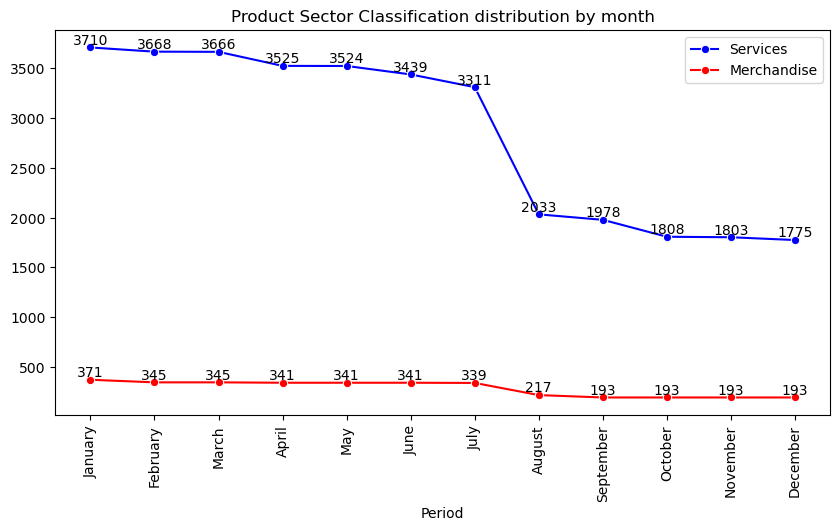

In [83]:
plt.figure(figsize=(10,5))
sns.lineplot(x=mounth_class.index,y=mounth_class.values,marker="o",color="blue",label="Services")
sns.lineplot(x=mounth_class_1.index,y=mounth_class_1.values,marker="o",color="red",label="Merchandise")
plt.xticks(rotation=90)
plt.title("Product Sector Classification distribution by month")
for x, y in zip(mounth_class.index, mounth_class.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')
for x, y in zip(mounth_class_1.index, mounth_class_1.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')
plt.legend();

### Monthly Distribution Analysis Between Two Categories: Services and Merchandise

This line chart analyzes the total counts of two categories, **Services** and **Merchandise**, across different months. The following observations can be made from the graph:

- The **Services** category exhibits larger fluctuations throughout the year, while the **Merchandise** category remains more stable.
- As of August, both categories experience declines; however, this decrease is more pronounced in the **Services** category.
- Based on this graph, it can be concluded that the **Services sector** has experienced a significant decline in the second half of the year, and the reasons behind this drop may need further investigation. 
- **Merchandise**, on the other hand, shows fewer changes throughout the year and remains more consistent.